In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

file_path = "../../data/processed/medical_equipment_utilization_synthetic_cleaned(in).csv"

raw_df = pd.read_csv(file_path)
raw_df.columns = [c.strip().replace(" ", "_") for c in raw_df.columns]

df = raw_df.dropna(axis=1, how="all").copy()

numeric_cols = [
    "Available_Hours",
    "Actual_Operating_Hours",
    "Utilization_Rate",
    "Number_of_Procedures",
]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

if "Date" in df.columns:
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

by_type = (
    df.groupby("Equipment_Type")
    .agg(
        avg_utilization_rate=("Utilization_Rate", "mean"),
        avg_procedures_per_day=("Number_of_Procedures", "mean"),
        avg_operating_hours=("Actual_Operating_Hours", "mean"),
    )
)

by_dept = (
    df.groupby("Department")
    .agg(
        avg_utilization_rate=("Utilization_Rate", "mean"),
        avg_procedures_per_day=("Number_of_Procedures", "mean"),
    )
)

if "Month" in df.columns:
    by_month = (
        df.groupby("Month")
        .agg(
            avg_utilization_rate=("Utilization_Rate", "mean"),
            total_procedures=("Number_of_Procedures", "sum"),
        )
    )
else:
    by_month = None

by_type.round(2), by_dept.round(2)


(                  avg_utilization_rate  avg_procedures_per_day  \
 Equipment_Type                                                   
 CT Scanner                        0.61                   18.08   
 MRI Scanner                       0.19                    3.05   
 Mammography Unit                  0.62                   17.98   
 Ultrasound                        0.80                   26.95   
 X-Ray Machine                     0.62                   18.56   
 
                   avg_operating_hours  
 Equipment_Type                         
 CT Scanner                       8.27  
 MRI Scanner                      2.20  
 Mammography Unit                 8.54  
 Ultrasound                       7.98  
 X-Ray Machine                    8.56  ,
                 avg_utilization_rate  avg_procedures_per_day
 Department                                                  
 Radiology                       0.55                   16.57
 Women's Health                  0.62                  

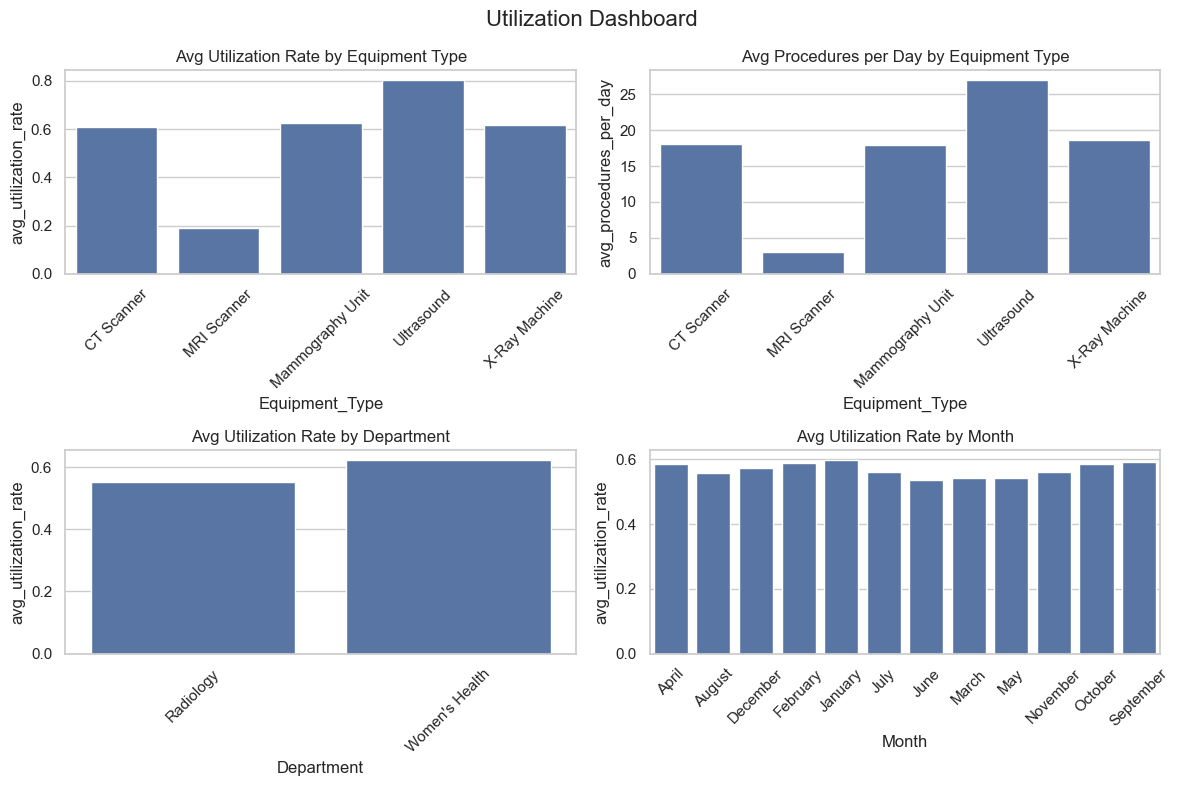

In [2]:
# --- Utilization dashboard ---

by_type_plot = by_type.reset_index().copy()
by_dept_plot = by_dept.reset_index().copy()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.barplot(data=by_type_plot, x="Equipment_Type", y="avg_utilization_rate", ax=axes[0, 0])
axes[0, 0].set_title("Avg Utilization Rate by Equipment Type")
axes[0, 0].tick_params(axis="x", rotation=45)

sns.barplot(data=by_type_plot, x="Equipment_Type", y="avg_procedures_per_day", ax=axes[0, 1])
axes[0, 1].set_title("Avg Procedures per Day by Equipment Type")
axes[0, 1].tick_params(axis="x", rotation=45)

sns.barplot(data=by_dept_plot, x="Department", y="avg_utilization_rate", ax=axes[1, 0])
axes[1, 0].set_title("Avg Utilization Rate by Department")
axes[1, 0].tick_params(axis="x", rotation=45)

if by_month is not None:
    by_month_plot = by_month.reset_index().copy()
    sns.barplot(data=by_month_plot, x="Month", y="avg_utilization_rate", ax=axes[1, 1])
    axes[1, 1].set_title("Avg Utilization Rate by Month")
    axes[1, 1].tick_params(axis="x", rotation=45)
else:
    axes[1, 1].axis("off")

plt.suptitle("Utilization Dashboard", fontsize=16)
plt.tight_layout()
plt.show()
